In [1]:
# Import libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from community import community_louvain
import warnings
import ipywidgets as widgets
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv(R"/Users/mareenapolin/Desktop/Grab SG Restaurants.csv")
df

,id_source,name,address,country,cuisine,currency,delivery_cost,lat,lon,opening_hours,image_url,radius,rating,reviews_nr,delivery_options,promo,loc_type,delivery_by,delivery_time
0,SGDD01085,Texas Chicken,Texas Chicken - VivoCity,Singapore,"[""Western"", ""Fast Food"", ""Halal"", ""Chicken"", ""...",SGD,570.0,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",https://d1sag4ddilekf6.cloudfront.net/compress...,5000,3.8,1591.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,43.0
1,4-CYTDLPUJEP53N6,Subway,Subway - Vivocity,Singapore,"[""Healthy"", ""Sandwiches"", ""Fast Food"", ""Halal""...",SGD,570.0,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",https://d1sag4ddilekf6.cloudfront.net/compress...,3000,4.2,197.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,42.0
2,SGDD05605,LiHO Tea,LiHO Tea - Vivo City,Singapore,"[""Same Prices In-Store"", ""Beverages"", ""Local"",...",SGD,560.0,1.264309,103.821369,"{""open"": true, ""displayedHours"": ""11:30-20:45""...",https://d1sag4ddilekf6.cloudfront.net/compress...,5000,4.5,353.0,DELIVERY_TAKEAWAY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,41.0
3,SGDD07548,Wingstop,Wingstop - VivoCity,Singapore,"[""Halal"", ""Chicken"", ""Fast Food"", ""Burger"", ""W...",SGD,560.0,1.263527,103.821712,"{""open"": true, ""displayedHours"": ""11:00-21:00""...",https://d1sag4ddilekf6.cloudfront.net/compress...,5000,4.4,1391.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,45.0
4,4-CY2ZLZLTT2EDJ2,Le Shrimp Ramen,Le Shrimp Ramen - Vivocity,Singapore,"[""Japanese"", ""Ramen"", ""Noodles"", ""Asian""]",SGD,570.0,1.264810,103.822554,"{""open"": true, ""displayedHours"": ""10:30-21:00""...",https://d1sag4ddilekf6.cloudfront.net/compress...,5000,4.6,309.0,DELIVERY_TAKEAWAY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16131,4-CZNFTYKKVA3UN2,Minjiangkueh,Minjiangkueh - Ang Mo Kio Ave 3,Singapore,"[""Asian"", ""Bakery & Cake"", ""Breakfast & Brunch...",NaN,NaN,1.370340,103.843225,"{""displayedHours"": ""Closed"", ""sun"": ""Closed"", ...",https://d1sag4ddilekf6.cloudfront.net/compress...,5000,5.0,2.0,DELIVERY_TAKEAWAY,NaN,FOOD,GRAB,26.0
16132,SGDD01192,The Modern Izakaya by Tatsu,The Modern Izakaya by Tatsu - Chijmes (#01-18),Singapore,"[""Japanese"", ""Noodles"", ""Grill""]",NaN,NaN,1.295404,103.851698,"{""displayedHours"": ""Closed"", ""sun"": ""12:00-14:...",https://d1sag4ddilekf6.cloudfront.net/compress...,3000,NaN,NaN,DELIVERY_TAKEAWAY,NaN,FOOD,GRAB,23.0
16133,SGDD00961,Raj Restaurant,Raj Restaurant - SOHO @ Farrer,Singapore,"[""Indian"", ""Dessert"", ""Vegetarian""]",SGD,560.0,1.310830,103.852873,"{""displayedHours"": ""Closed"", ""sun"": ""11:00-22:...",https://d1sag4ddilekf6.cloudfront.net/compress...,3000,3.9,72.0,DELIVERY_TAKEAWAY_DINEIN,NaN,FOOD,GRAB,26.0
16134,4-C2AHJVATN7C2RE,Albismi Indian Muslim Food,Albismi Indian Muslim Food - Woodlands Road,Singapore,"[""Indian""]",NaN,NaN,1.396885,103.753440,"{""displayedHours"": ""Closed"", ""sun"": ""09:00-22:...",https://d1sag4ddilekf6.cloudfront.net/compress...,5000,3.6,19.0,DELIVERY_TAKEAWAY,NaN,FOOD,GRAB,30.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16136 entries, 0 to 16135
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_source         16136 non-null  object 
 1   name              16130 non-null  object 
 2   address           16136 non-null  object 
 3   country           16136 non-null  object 
 4   cuisine           16134 non-null  object 
 5   currency          16117 non-null  object 
 6   delivery_cost     16085 non-null  float64
 7   lat               16136 non-null  float64
 8   lon               16136 non-null  float64
 9   opening_hours     16136 non-null  object 
 10  image_url         16125 non-null  object 
 11  radius            16136 non-null  int64  
 12  rating            14004 non-null  float64
 13  reviews_nr        13602 non-null  float64
 14  delivery_options  16136 non-null  object 
 15  promo             8777 non-null   object 
 16  loc_type          16136 non-null  object

In [4]:
df.isnull().sum()

id_source              0
name                   6
address                0
country                0
cuisine                2
currency              19
delivery_cost         51
lat                    0
lon                    0
opening_hours          0
image_url             11
radius                 0
rating              2132
reviews_nr          2534
delivery_options       0
promo               7359
loc_type               0
delivery_by            0
delivery_time        183
dtype: int64

In [5]:
df.dropna(subset=['name'], inplace=True)

In [6]:
df['cuisine'].dropna(inplace=True)

In [7]:
df['cuisine'].unique()

array(['["Western", "Fast Food", "Halal", "Chicken", "Beverages"]',
       '["Healthy", "Sandwiches", "Fast Food", "Halal", "Western"]',
       '["Same Prices In-Store", "Beverages", "Local", "Bubble Tea"]',
       ..., '["Chicken", "Korean", "Fried Chicken"]',
       '["Asian", "Bakery & Cake", "Breakfast & Brunch", "Singaporean"]',
       '["Japanese", "Noodles", "Grill"]'], dtype=object)

In [8]:
df['cuisine'].value_counts()

["Chinese"]                                                189
["Asian", "Chinese"]                                       175
["Local", "Chinese"]                                       135
["Western"]                                                134
["Local"]                                                  120
                                                          ... 
["Chinese", "Seafood", "Fast Food"]                          1
["Steak", "Western", "Ramen", "Islandwide Delivery"]         1
["Beverages", "Dessert", "Durian"]                           1
["Asian", "BBQ", "Fried Chicken", "Malaysian", "Snack"]      1
["Japanese", "Noodles", "Grill"]                             1
Name: cuisine, Length: 7488, dtype: int64

<AxesSubplot:xlabel='cuisine'>

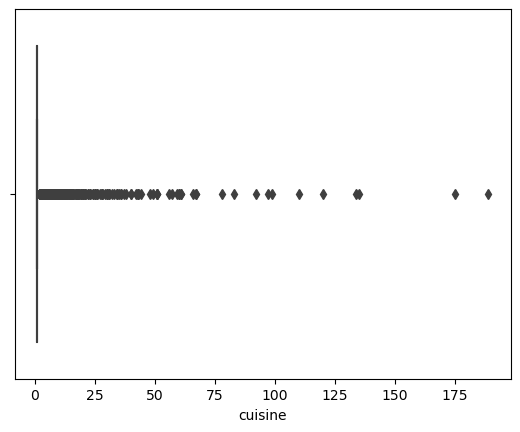

In [9]:
sns.boxplot(df['cuisine'].value_counts())

In [10]:
df['cuisine'].fillna('Chinese',inplace=True)

In [11]:
df['currency'].fillna('SGD',inplace=True)

<AxesSubplot:xlabel='delivery_cost'>

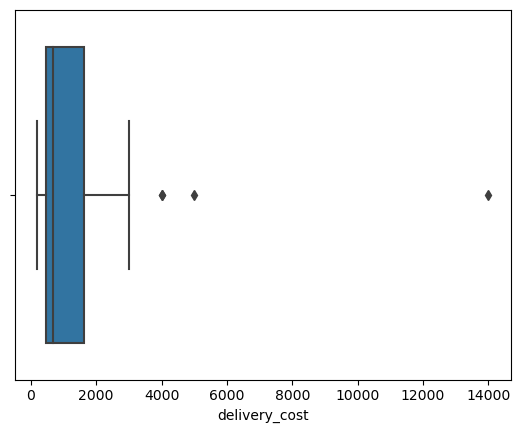

In [12]:
sns.boxplot(df['delivery_cost'])

In [13]:
df['delivery_cost'].fillna(df['delivery_cost'].mean(),inplace=True)

In [14]:
df.drop(['loc_type', 'delivery_by', 'delivery_time','radius','image_url','opening_hours','promo','lat','lon'], axis=1, inplace=True)

<AxesSubplot:xlabel='rating'>

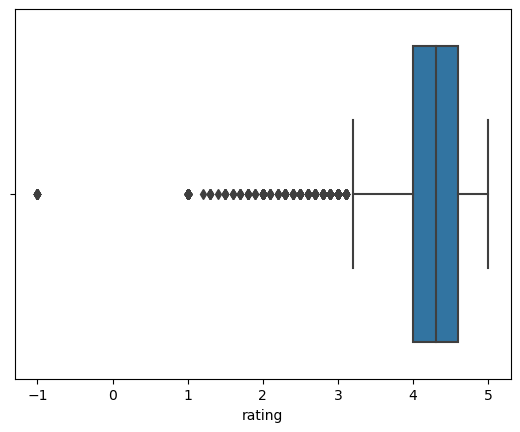

In [15]:
sns.boxplot(df['rating'])

In [16]:
df['rating'].fillna(df['rating'].median(),inplace=True)

<AxesSubplot:xlabel='reviews_nr'>

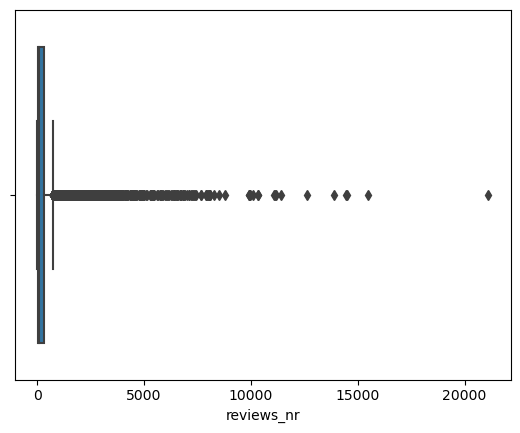

In [17]:
sns.boxplot(df['reviews_nr'])

In [18]:
df['reviews_nr'].fillna(df['reviews_nr'].median(),inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16130 entries, 0 to 16135
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_source         16130 non-null  object 
 1   name              16130 non-null  object 
 2   address           16130 non-null  object 
 3   country           16130 non-null  object 
 4   cuisine           16130 non-null  object 
 5   currency          16130 non-null  object 
 6   delivery_cost     16130 non-null  float64
 7   rating            16130 non-null  float64
 8   reviews_nr        16130 non-null  float64
 9   delivery_options  16130 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.4+ MB


In [20]:
df.head()

,id_source,name,address,country,cuisine,currency,delivery_cost,rating,reviews_nr,delivery_options
0,SGDD01085,Texas Chicken,Texas Chicken - VivoCity,Singapore,"[""Western"", ""Fast Food"", ""Halal"", ""Chicken"", ""...",SGD,570.0,3.8,1591.0,ONLY_DELIVERY
1,4-CYTDLPUJEP53N6,Subway,Subway - Vivocity,Singapore,"[""Healthy"", ""Sandwiches"", ""Fast Food"", ""Halal""...",SGD,570.0,4.2,197.0,ONLY_DELIVERY
2,SGDD05605,LiHO Tea,LiHO Tea - Vivo City,Singapore,"[""Same Prices In-Store"", ""Beverages"", ""Local"",...",SGD,560.0,4.5,353.0,DELIVERY_TAKEAWAY
3,SGDD07548,Wingstop,Wingstop - VivoCity,Singapore,"[""Halal"", ""Chicken"", ""Fast Food"", ""Burger"", ""W...",SGD,560.0,4.4,1391.0,ONLY_DELIVERY
4,4-CY2ZLZLTT2EDJ2,Le Shrimp Ramen,Le Shrimp Ramen - Vivocity,Singapore,"[""Japanese"", ""Ramen"", ""Noodles"", ""Asian""]",SGD,570.0,4.6,309.0,DELIVERY_TAKEAWAY


In [21]:
df_sample = df.iloc[:30] 

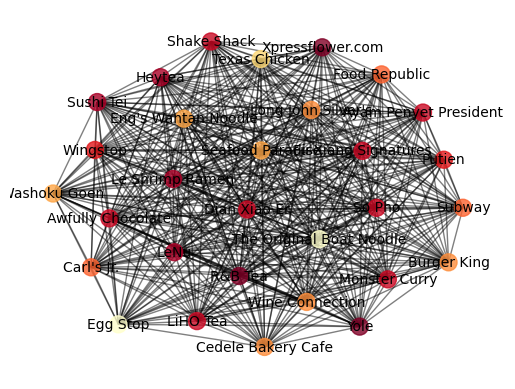

In [22]:
# Create a new empty graph
G = nx.Graph()

# Add vertices (nodes) to the graph for each restaurant name
for restaurant in df_sample['name']:
    G.add_node(restaurant)

# Add edges to the graph for each pair of restaurants with a higher rating than a threshold
rating_threshold = 1.0
for i, r1 in df_sample.iterrows():
    for j, r2 in df_sample.iterrows():
        if i < j and r1['rating'] > rating_threshold and r2['rating'] > rating_threshold:
            G.add_edge(r1['name'], r2['name'], weight=r1['rating'])

# Calculate the layout of the graph using the spring layout algorithm
pos = nx.spring_layout(G, k=0.5, seed=42)

# Draw the nodes of the graph using circles of different colors based on rating
node_color = [r['rating'] for i, r in df_sample.iterrows()]
cmap = plt.cm.get_cmap('YlOrRd')
nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=150, alpha=0.8, cmap=cmap)

# Draw the edges of the graph using solid lines of varying thickness based on weight

nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, edge_color='k')

# Draw the labels of the graph
node_labels = dict(zip(list(G.nodes()), list(G.nodes())))
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')

# Set the axis off and display the plot
plt.axis('off')
plt.show()


In [23]:
df_sample = df.iloc[:300] 

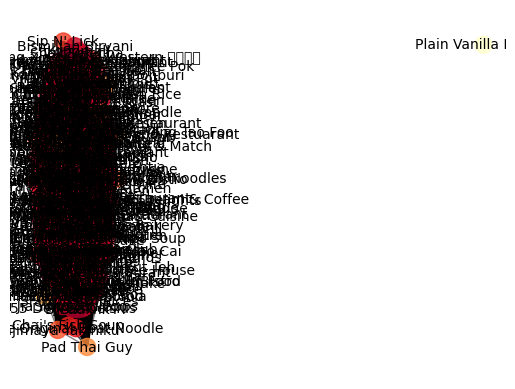

In [24]:
# Create a new empty graph
G = nx.Graph()

# Add vertices (nodes) to the graph for each restaurant name
for restaurant in df_sample['name']:
    G.add_node(restaurant)

# Add edges to the graph for each pair of restaurants with a higher rating than a threshold
rating_threshold = 1.0
for i, r1 in df_sample.iterrows():
    for j, r2 in df_sample.iterrows():
        if i < j and r1['rating'] > rating_threshold and r2['rating'] > rating_threshold:
            G.add_edge(r1['name'], r2['name'], weight=r1['rating'])

# Calculate the layout of the graph using the spring layout algorithm
pos = nx.spring_layout(G, k=0.5, seed=42)

# Draw the nodes of the graph using circles of different colors based on rating
node_color = [r['rating'] for i, r in df_sample.iterrows()]
cmap = plt.cm.get_cmap('YlOrRd')
nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=150, alpha=0.8, cmap=cmap)

# Draw the edges of the graph using solid lines of varying thickness based on weight
edge_width = [d['weight'] for (u, v, d) in G.edges(data=True)]
edge_color = 'gray'
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, edge_color='k')

# Draw the labels of the graph
node_labels = dict(zip(list(G.nodes()), list(G.nodes())))
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')

# Set the axis off and display the plot
plt.axis('off')
plt.show()


In [25]:
# Define a function that generates recommendations for the selected restaurant
def generate_recommendations(selected_restaurant):
    # Get the neighbors of the selected restaurant
    neighbors = list(G.neighbors(selected_restaurant))

    # Sort the neighbors by weight (rating)
    sorted_neighbors = sorted(neighbors, key=lambda x: G[selected_restaurant][x]['weight'], reverse=True)

    # Return the top 5 recommendations
    return sorted_neighbors[:5]

# Create a dropdown widget with restaurant names as options
restaurant_options = list(G.nodes())
restaurant_dropdown = widgets.Dropdown(options=restaurant_options)

# Define a function that updates the recommendations based on the selected restaurant
def update_recommendations(change):
    selected_restaurant = change['new']
    recommendations = generate_recommendations(selected_restaurant)
    print(f"Top 5 recommendations for {selected_restaurant}:")
    for i, recommendation in enumerate(recommendations):
        print(f"{i+1}. {recommendation}")

# Register the function as a callback for when the dropdown value changes
restaurant_dropdown.observe(update_recommendations, names='value')

# Display the dropdown widget
display(restaurant_dropdown)

Dropdown(options=('Texas Chicken', 'Subway', 'LiHO Tea', 'Wingstop', 'Le Shrimp Ramen', 'Heytea', 'Burger King…